<a href="https://colab.research.google.com/github/Nikhil2374/Computer-Vision/blob/main/Implement%20boundary%20linking%2C%20representation%2C%20and%20description%20%20%20techniques%20on%20images..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boundary: [(277, 32), (276, 33), (278, 32), (279, 32), (280, 32), (281, 32), (282, 32), (283, 32), (284, 32), (285, 32), (286, 32), (287, 32), (288, 32), (289, 32), (290, 32), (291, 32), (292, 32), (293, 32), (294, 33), (295, 33), (296, 33), (297, 33), (298, 33), (299, 33), (300, 34), (301, 34), (302, 34), (302, 35), (303, 35), (304, 35), (305, 36), (306, 36), (307, 36), (308, 36), (309, 37), (310, 37), (311, 37), (312, 37), (313, 38), (314, 38), (315, 38), (315, 39), (316, 39), (317, 39), (317, 40), (318, 40), (275, 33), (274, 33), (273, 33), (272, 33), (271, 33), (270, 33), (269, 33), (268, 33), (267, 33), (266, 33), (265, 33), (264, 34), (263, 34), (262, 34), (261, 34), (260, 34), (259, 35), (258, 35), (257, 35), (256, 35), (255, 36), (254, 36), (253, 37), (252, 37), (251, 37), (250, 38), (249, 38), (248, 38), (247, 39), (246, 39), (245, 39), (245, 40), (244, 40), (243, 40), (243, 41), (242, 41), (241, 41), (240, 42), (239, 42), (239, 43), (238, 43), (237, 43), (236, 44), (235, 44),

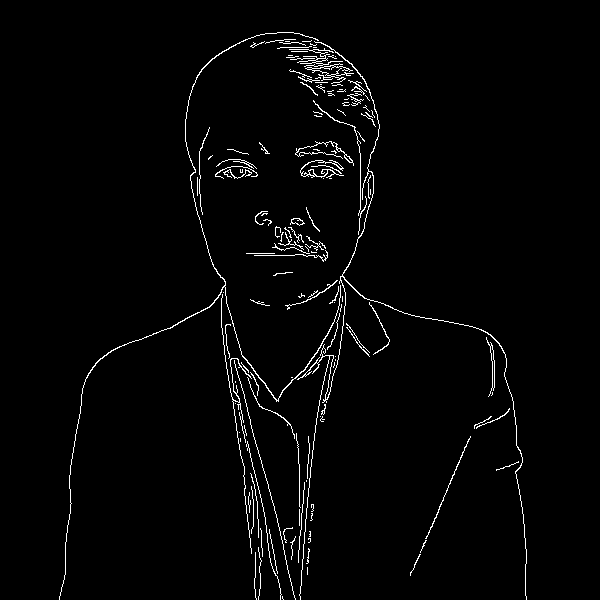

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load input image in grayscale
image = cv2.imread('input_image.png', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection to generate an edge image
edges = cv2.Canny(image, 100, 200)

# Initialize an empty list to store boundaries
def boundary_linking(edge_image):
    boundaries = []
    height, width = edge_image.shape

    # Create a visited array to mark visited pixels
    visited = np.zeros_like(edge_image, dtype=bool)

    # Define 8-connected neighborhood
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    def is_valid(x, y):
        return (
            0 <= x < width and
            0 <= y < height and
            edge_image[y][x] == 255 and
            not visited[y][x]
        )

    def follow_edge(x, y):
        boundary = [(x, y)]
        visited[y][x] = True
        stack = [(x, y)]

        while stack:
            cx, cy = stack.pop()

            for dx, dy in neighbors:
                nx, ny = cx + dx, cy + dy

                if is_valid(nx, ny):
                    visited[ny][nx] = True
                    boundary.append((nx, ny))
                    stack.append((nx, ny))

        return boundary

    # Iterate through each pixel in the edge image
    for y in range(height):
        for x in range(width):
            if edge_image[y][x] == 255 and not visited[y][x]:
                boundary = follow_edge(x, y)
                boundaries.append(boundary)

    return boundaries

# Apply boundary linking on the edge image
boundaries = boundary_linking(edges)

# Print out the boundary points
for boundary in boundaries:
    print("Boundary:", boundary)

# Optionally, visualize the detected boundaries
output_image = np.zeros_like(image)
for boundary in boundaries:
    for (x, y) in boundary:
        output_image[y][x] = 255

cv2_imshow(output_image)
